In [3310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# 1.POPULATION import donnees et nettoyage

# Lexique des données
            Un fichier de population qui inclut :
        -	Le pays.
        -	L’année.
        -	La population du pays, exprimée en milliers d’habitants.


In [3311]:
# Importation des données population (en milliers d'habitants)
population = pd.read_csv("./Documents/P4_Mendy_Angele/SOURCE/population.csv") 
population.head(3)

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603


In [3312]:
df_population = population.loc[population["Année"]== 2017]
df_population.reset_index(inplace=True)
del df_population["index"]
df_population

,Zone,Année,Valeur
0,Afghanistan,2017,36296.113
1,Afrique du Sud,2017,57009.756
2,Albanie,2017,2884.169
3,Algérie,2017,41389.189
4,Allemagne,2017,82658.409
...,...,...,...
231,Venezuela (République bolivarienne du),2017,29402.484
232,Viet Nam,2017,94600.648
233,Yémen,2017,27834.819
234,Zambie,2017,16853.599


In [3313]:
# Ajout de la colonne population_mondiale_2017 au df (7 548 134 111.0)
population_mondiale= (df_population["Valeur"]*1000).sum()

print("La population mondiale s'élève à " + str(population_mondiale) + " personnes.")

La population mondiale s'élève à 7548134111.0 personnes.


In [3314]:
df_population["population_2017"]=df_population["Valeur"]*1000
df_population

<ipython-input-3314-b9234c84868c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_population["population_2017"]=df_population["Valeur"]*1000


,Zone,Année,Valeur,population_2017
0,Afghanistan,2017,36296.113,36296113.0
1,Afrique du Sud,2017,57009.756,57009756.0
2,Albanie,2017,2884.169,2884169.0
3,Algérie,2017,41389.189,41389189.0
4,Allemagne,2017,82658.409,82658409.0
...,...,...,...,...
231,Venezuela (République bolivarienne du),2017,29402.484,29402484.0
232,Viet Nam,2017,94600.648,94600648.0
233,Yémen,2017,27834.819,27834819.0
234,Zambie,2017,16853.599,16853599.0


In [3315]:
# Importation fichier contenant continents/Pays pour une analyse géographique
FAO_continent=pd.read_csv("./Documents/P4_Mendy_Angele/SOURCE/FAO_continent.csv", delimiter=";")
FAO_continent.dropna(inplace=True)
FAO_continent = FAO_continent.rename(columns={"Pays": "Zone"})
FAO_continent = FAO_continent.rename(columns={"Groupe de pays": "Continent"})
FAO_continent.head(5)

,Continent,Zone
0,Afrique,Afrique du Sud
1,Afrique,Algérie
2,Afrique,Angola
3,Afrique,Archipel des Chagos
4,Afrique,Bénin


In [3316]:
FAO_continent["Continent"].unique()

array(['Afrique', 'Amérique centrale', 'Europe', 'Amérique du Nord',
       'Asie', 'Amérique du Sud', 'Caraïbes',
       'Australie et Nouvelle-Zélande', 'Océanie'], dtype=object)

In [2548]:
test = df_population.merge(FAO_continent, on='Zone', how='outer' )
test.dropna(inplace=True)
test = test.drop_duplicates(["Zone",]).reset_index(drop=True)
test = test[["Continent","Zone", "Année", "population_2017"]]
test.isna().sum()

Continent          0
Zone               0
Année              0
population_2017    0
dtype: int64

In [3317]:
#liste desz pays manquant -> sur excel rajouter ces pays au doc FAO puis re merge test 236raw??
#inverse du is in = resultat 
pays = test["Zone"].values.tolist()
test1=df_population[~df_population.Zone.isin(pays)]
test1

,Zone,Année,Valeur,population_2017
28,"Bonaire, Saint-Eustache et Saba",2017,25.401,2.540100e+04
43,"Chine, continentale",2017,1421021.791,1.421022e+09
44,"Chine, Taiwan Province de",2017,23674.546,2.367455e+07
189,"Sainte-Hélène, Ascension et Tristan da Cunha",2017,6.008,6.008000e+03
205,Sint Maarten (partie néerlandaise),2017,41.444,4.144400e+04


In [3318]:
test2 = test.append(test1, ignore_index=False, verify_integrity=False, sort=False)
#test2 = test2.drop_duplicates(["Zone","Continent"]).reset_index(drop=True)
test2.reset_index(inplace=True)
test2
#

,index,Continent,Zone,Année,population_2017,Valeur
0,0,Asie,Afghanistan,2017.0,3.629611e+07,NaN
1,1,Afrique,Afrique du Sud,2017.0,5.700976e+07,NaN
2,2,Europe,Albanie,2017.0,2.884169e+06,NaN
3,3,Afrique,Algérie,2017.0,4.138919e+07,NaN
4,4,Europe,Allemagne,2017.0,8.265841e+07,NaN
...,...,...,...,...,...,...
231,28,NaN,"Bonaire, Saint-Eustache et Saba",2017.0,2.540100e+04,25.401
232,43,NaN,"Chine, continentale",2017.0,1.421022e+09,1421021.791
233,44,NaN,"Chine, Taiwan Province de",2017.0,2.367455e+07,23674.546
234,189,NaN,"Sainte-Hélène, Ascension et Tristan da Cunha",2017.0,6.008000e+03,6.008


In [3319]:
test2["Continent"] =test2["Continent"].fillna("Oceanie")

In [3320]:
test2.tail(10)

,index,Continent,Zone,Année,population_2017,Valeur
226,226,Amérique du Sud,Venezuela (République bolivarienne du),2017.0,2.940248e+07,NaN
227,227,Asie,Viet Nam,2017.0,9.460065e+07,NaN
228,228,Asie,Yémen,2017.0,2.783482e+07,NaN
229,229,Afrique,Zambie,2017.0,1.685360e+07,NaN
230,230,Afrique,Zimbabwe,2017.0,1.423660e+07,NaN
231,28,Oceanie,"Bonaire, Saint-Eustache et Saba",2017.0,2.540100e+04,25.401
232,43,Oceanie,"Chine, continentale",2017.0,1.421022e+09,1421021.791
233,44,Oceanie,"Chine, Taiwan Province de",2017.0,2.367455e+07,23674.546
234,189,Oceanie,"Sainte-Hélène, Ascension et Tristan da Cunha",2017.0,6.008000e+03,6.008
235,205,Oceanie,Sint Maarten (partie néerlandaise),2017.0,4.144400e+04,41.444


In [3322]:
test2.loc[test2["Zone"]=="Chine, Taiwan Province de"].replace("Oceanie", "Asie")

,index,Continent,Zone,Année,population_2017,Valeur
233,44,Asie,"Chine, Taiwan Province de",2017.0,23674546.0,23674.546


In [3323]:
test2.iloc[233]=test2.iloc[233].replace("Oceanie", "Asie")
test2.iloc[232]=test2.iloc[232].replace("Oceanie", "Asie")

In [3324]:
df_population_2017 = test2[['Continent', 'Zone', 'Année', 'population_2017']]
df_population_2017

,Continent,Zone,Année,population_2017
0,Asie,Afghanistan,2017.0,3.629611e+07
1,Afrique,Afrique du Sud,2017.0,5.700976e+07
2,Europe,Albanie,2017.0,2.884169e+06
3,Afrique,Algérie,2017.0,4.138919e+07
4,Europe,Allemagne,2017.0,8.265841e+07
...,...,...,...,...
231,Oceanie,"Bonaire, Saint-Eustache et Saba",2017.0,2.540100e+04
232,Asie,"Chine, continentale",2017.0,1.421022e+09
233,Asie,"Chine, Taiwan Province de",2017.0,2.367455e+07
234,Oceanie,"Sainte-Hélène, Ascension et Tristan da Cunha",2017.0,6.008000e+03


In [3325]:
df_population["population_2017"].sum()==df_population_2017["population_2017"].sum()

True

# 2. DISPONIBILITE ALIMENTAIRE import donnees et nettoyage

  # Lexique des données
        Un fichier de disponibilité alimentaire pour l’année 2013 qui contient 17 variables :
    -	Le pays.
    -	Le produit.
    -	4 variables de disponibilité alimentaire. Ces 4 variables sont exprimées dans des unités bien spécifiques, qui sont précisées directement dans le nom de la variable. À noter cependant que la notation         kcal est un abus de langage, elle correspond à une calorie réelle.
    -	10 variables qui précisent les utilisations/moyens d’acquisition de la disponibilité alimentaire. Elles sont toutes exprimées en milliers de tonnes.
    -	Enfin, une variable type qui précise si le produit est d’origine animale ou végétale.


In [3326]:
# Import disponibilite alimentaire
dispo_alimentaire = pd.read_csv("./Documents/P4_Mendy_Angele/SOURCE/dispo_alimentaire.csv")
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [3327]:
# Remplacement des éspaces vides par "_" pour les variables
dispo_alimentaire.columns = dispo_alimentaire.columns.str.replace(' ', '_')

In [3328]:
dispo_alimentaire.shape

(15605, 18)

In [3329]:
# Verification du type de donnees
dispo_alimentaire.dtypes 

Zone                                                              object
Produit                                                           object
Origine                                                           object
Aliments_pour_animaux                                            float64
Autres_Utilisations                                              float64
Disponibilité_alimentaire_(Kcal/personne/jour)                   float64
Disponibilité_alimentaire_en_quantité_(kg/personne/an)           float64
Disponibilité_de_matière_grasse_en_quantité_(g/personne/jour)    float64
Disponibilité_de_protéines_en_quantité_(g/personne/jour)         float64
Disponibilité_intérieure                                         float64
Exportations_-_Quantité                                          float64
Importations_-_Quantité                                          float64
Nourriture                                                       float64
Pertes                                             

In [3330]:
# Detection des valeurs manquantes
dispo_alimentaire.isna().sum().sum() 

93156

In [3331]:
# Localisation des valeurs manquantes
dispo_alimentaire.isna().sum()

Zone                                                                 0
Produit                                                              0
Origine                                                              0
Aliments_pour_animaux                                            12885
Autres_Utilisations                                              10109
Disponibilité_alimentaire_(Kcal/personne/jour)                    1364
Disponibilité_alimentaire_en_quantité_(kg/personne/an)            1590
Disponibilité_de_matière_grasse_en_quantité_(g/personne/jour)     3811
Disponibilité_de_protéines_en_quantité_(g/personne/jour)          4044
Disponibilité_intérieure                                           223
Exportations_-_Quantité                                           3379
Importations_-_Quantité                                            753
Nourriture                                                        1590
Pertes                                                           11327
Produc

In [3332]:
# Traitement des valeurs manquantes
    # si a supprimer dispo_alimentaire.dropna(inplace = True) mais suppression de ligne
    # Ici le NaN vaut 0 car Produit non compatible avec Aliments pour animaux
# Fill NaN par 0 pour conserver données 
# Affichage de 3 lignes 
dispo_alimentaire["Aliments_pour_animaux"] = dispo_alimentaire["Aliments_pour_animaux"].fillna(0)

In [3333]:
# Traitement des données manquantes
#dispo_alimentaire = dispo_alimentaire.fillna(0)
# ou 
#dispo_alimentaire.dropna(inplace = True)
#dispo_alimentaire.isna().sum().sum()
# PAS DE TRAITEMENT DES VALEURS MANQUANTES

# 3. SOUS NUTRITION import données et nettoyage¶

# Lexique des données
        Un fichier d’insécurité alimentaire, qui inclut :
    -	Le pays.
    -	Intervalle d’années.
    -	Le nombre de personnes en sous-alimentation en millions d’habitants (ex. : pour l’intervalle 2012-2014, le nombre de personnes correspond à la moyenne sur ces 3 années, on peut le résumer en 2013).


In [3334]:
# Import sous nutrition
sous_nutrition = pd.read_csv("./Documents/P4_Mendy_Angele/SOURCE/sous_nutrition.csv")
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [3335]:
#Dimension des donnees
sous_nutrition.shape

(1218, 3)

In [3336]:
# Detection des valeurs manquantes
sous_nutrition.isna().sum().sum() 

594

In [3337]:
# Localisation des valeurs manquantes 
sous_nutrition.isna().sum()

Zone        0
Année       0
Valeur    594
dtype: int64

In [3338]:
sous_nutrition["Valeur"].unique()

array(['8.6', '8.8', '8.9', '9.7', '10.5', '11.1', '2.2', '2.5', '2.8',
       '3', '3.1', '3.3', '0.1', '1.3', '1.2', nan, '7.6', '6.2', '5.3',
       '5.6', '5.8', '5.7', '1.5', '1.6', '1.1', '1.7', '<0.1', '21.7',
       '22.4', '23.3', '22.3', '21.5', '20.9', '0.8', '2', '1.9', '1.8',
       '0.4', '0.5', '0.3', '0.2', '3.2', '3.4', '3.6', '3.8', '2.1',
       '2.3', '2.4', '0.6', '0.7', '0.9', '3.9', '2.7', '1.4', '4.8',
       '4.6', '4.9', '5', '4.4', '4.3', '4.2', '4.5', '26.2', '24.3',
       '21.3', '21.1', '2.9', '5.1', '5.2', '5.4', '203.8', '198.3',
       '193.1', '190.9', '190.1', '189.2', '23.6', '24', '24.1', '3.7',
       '7.3', '7.8', '8.4', '9', '9.1', '10.1', '10', '10.7', '11.5',
       '11.9', '11.8', '8.7', '10.3', '11', '1', '5.5', '6.8', '7.9',
       '5.9', '7', '9.2', '9.4', '9.6', '6.7', '7.1', '7.2', '14.7',
       '17.4', '20.2', '22.2', '22.8', '24.6', '31.1', '28.5', '25.4',
       '24.8', '26.1', '14.5', '15.4', '16.5', '15.8', '15.7', '10.8',
       '

In [3339]:
# sous_nutrition["Valeur"] = pd.to_numeric(sous_nutrition["Valeur"])
# Si sous_nutrition["Valeur"] = pd.to_numeric(sous_nutrition["Valeur"])errors="coerce") Corrige "<0.1"  en NaN
    #ValueError: Unable to parse string "<0.1" at position 60
sous_nutrition.loc[sous_nutrition["Valeur"]=="<0.1"] = sous_nutrition.replace({'Valeur': r"<0.1"}, {'Valeur': "0.01"}, regex=True)
sous_nutrition.loc[60]

Zone        Arménie
Année     2012-2014
Valeur         0.01
Name: 60, dtype: object

In [3340]:
# Conversion colonne Valeur en numeric
sous_nutrition["Valeur"] = pd.to_numeric(sous_nutrition["Valeur"])
sous_nutrition.dtypes

Zone       object
Année      object
Valeur    float64
dtype: object

In [3341]:
# Calcul pop sous nutrie en millions d'habitants
sous_nutrition["pop_sous_nourrie"]= sous_nutrition["Valeur"]*1_000_000
sous_nutrition.head(2)

,Zone,Année,Valeur,pop_sous_nourrie
0,Afghanistan,2012-2014,8.6,8600000.0
1,Afghanistan,2013-2015,8.8,8800000.0


In [3342]:
# Modification variable "2016-2018" en "2017"
sous_nutrition.loc[sous_nutrition["Année"]=="2016-2018"] = sous_nutrition.replace({'Année': r"2016-2018"}, {'Année': "2017"}, regex=True)
sous_nutrition

,Zone,Année,Valeur,pop_sous_nourrie
0,Afghanistan,2012-2014,8.6,8600000.0
1,Afghanistan,2013-2015,8.8,8800000.0
2,Afghanistan,2014-2016,8.9,8900000.0
3,Afghanistan,2015-2017,9.7,9700000.0
4,Afghanistan,2017,10.5,10500000.0
...,...,...,...,...
1213,Zimbabwe,2013-2015,NaN,NaN
1214,Zimbabwe,2014-2016,NaN,NaN
1215,Zimbabwe,2015-2017,NaN,NaN
1216,Zimbabwe,2017,NaN,NaN


In [3343]:
#Isolation variable "Année" 2017
sous_nutrition_2017 =  sous_nutrition.loc[population["Année"]== 2017]
sous_nutrition_2017.reset_index(inplace=True)
del sous_nutrition_2017["index"]
sous_nutrition_2017


,Zone,Année,Valeur,pop_sous_nourrie
0,Afghanistan,2017,10.5,10500000.0
1,Afrique du Sud,2017,3.1,3100000.0
2,Albanie,2017,0.1,100000.0
3,Algérie,2017,1.3,1300000.0
4,Allemagne,2017,NaN,NaN
...,...,...,...,...
198,Venezuela (République bolivarienne du),2017,8.0,8000000.0
199,Viet Nam,2017,6.5,6500000.0
200,Yémen,2017,NaN,NaN
201,Zambie,2017,NaN,NaN


In [3344]:
sous_nutrition_2017.isna().sum()

Zone                 0
Année                0
Valeur              99
pop_sous_nourrie    99
dtype: int64

In [3345]:
#Traitement des données manquantes
sous_nutrition_2017 = sous_nutrition_2017.dropna(0)
sous_nutrition_2017.isna().sum().sum()

0

# 4'. AIDE ALIMENTAIRE import données et nettoyage¶¶

# Lexique des données
        Un fichier de population qui inclut :
    -    Le pays bénéficiaire.
    -    L’année.
    -    Le produit.
    -    La quantité qui a été donnée comme aide alimentaire, en tonnes.


In [3346]:
# Import aide alimentaire
aide_alimentaire = pd.read_csv("./Documents/P4_Mendy_Angele/SOURCE/aide_alimentaire.csv") 
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [3347]:
# Remplacement des éspaces vides par "_" pour les variables
aide_alimentaire.columns = aide_alimentaire.columns.str.replace(' ', '_')

In [3348]:
# Detection des valeurs manquantes
aide_alimentaire.isna().sum()

Pays_bénéficiaire    0
Année                0
Produit              0
Valeur               0
dtype: int64

In [3349]:
#Dimension des donnees
aide_alimentaire.shape

(1475, 4)

In [3350]:
# Verification du type de donnees
aide_alimentaire.dtypes 

Pays_bénéficiaire    object
Année                 int64
Produit              object
Valeur                int64
dtype: object

# Proportion de personnes en état de sous-nutrition en 2017 

In [3351]:
# Total_personnes_sous_nutrie_en_2017 en Millions (535 900 000.0)
sous_nutrition_mondiale = sous_nutrition_2017["pop_sous_nourrie"].sum()
print("Le nombre de personnes en état de sous-nutrition en 2017 est de " + str(sous_nutrition_mondiale)+" personnes")

Le nombre de personnes en état de sous-nutrition en 2017 est de 535900000.0 personnes


In [3352]:
ratio_sous_nutrition_mondiale = (sous_nutrition_mondiale) / (population_mondiale) *100
print("La proportion de personnes en état de sous-nutrition en 2017 est de " + str(ratio_sous_nutrition_mondiale) + "%")

La proportion de personnes en état de sous-nutrition en 2017 est de 7.099767864736604%


In [3356]:
# Analyse de la population sous nourrie par continent
df_sous_nutrition = df_sous_nutrition[["Zone", "pop_sous_nourrie"]]
ratio_sous_nutrition = df_sous_nutrition.merge(df_population_2017, how='left', on='Zone')
ratio_sous_nutrition = ratio_sous_nutrition[['Continent', 'pop_sous_nourrie', 'population_2017']]
ratio_sous_nutrition = ratio_sous_nutrition.groupby(['Continent']).sum()
ratio_sous_nutrition["ratio_pop_sous_nourrie"]=ratio_sous_nutrition["pop_sous_nourrie"]/ratio_sous_nutrition["population_2017"]*100

ratio_sous_nutrition.reset_index(inplace=True)
ratio_sous_nutrition

,Continent,pop_sous_nourrie,population_2017,ratio_pop_sous_nourrie
0,Afrique,148630000.0,9.879145e+08,15.044824
1,Amérique centrale,14610000.0,1.733268e+08,8.429165
2,Amérique du Sud,25060000.0,2.346231e+08,10.680961
3,Asie,345030000.0,2.713667e+09,12.714531
4,Europe,2510000.0,7.083385e+07,3.543504
5,Océanie,60000.0,2.466418e+06,2.432678


# Nombre théorique de personnes qui pourraient être nourries

In [3357]:
KcalPays_pop = pd.merge(df_population_2017, dispo_alimentaire, on='Zone', how='right')
KcalPays_pop.head(5)

,Continent,Zone,Année,population_2017,Produit,Origine,Aliments_pour_animaux,Autres_Utilisations,Disponibilité_alimentaire_(Kcal/personne/jour),Disponibilité_alimentaire_en_quantité_(kg/personne/an),...,Disponibilité_de_protéines_en_quantité_(g/personne/jour),Disponibilité_intérieure,Exportations_-_Quantité,Importations_-_Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation_de_stock
0,Asie,Afghanistan,2017.0,36296113.0,Abats Comestible,animale,0.0,NaN,5.0,1.72,...,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Asie,Afghanistan,2017.0,36296113.0,"Agrumes, Autres",vegetale,0.0,NaN,1.0,1.29,...,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Asie,Afghanistan,2017.0,36296113.0,Aliments pour enfants,vegetale,0.0,NaN,1.0,0.06,...,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Asie,Afghanistan,2017.0,36296113.0,Ananas,vegetale,0.0,NaN,0.0,0.00,...,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Asie,Afghanistan,2017.0,36296113.0,Bananes,vegetale,0.0,NaN,4.0,2.70,...,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [3358]:
#Trop bon resultat sans le drop na 7635429388975814.0
#Dispo alimentaire mondiale 
Dispo_Kcal_mondiale = ((KcalPays_pop["Disponibilité_alimentaire_(Kcal/personne/jour)"] * KcalPays_pop["population_2017"] * 365
).sum())
#print("La dispo alimentaire mondiale en Kcal est de " + str(Dispo_Kcal_mondiale))

print("La dispo alimentaire mondiale en Kcal est de {}".format(Dispo_Kcal_mondiale))

La dispo alimentaire mondiale en Kcal est de 7635429388975815.0


In [3359]:
# 1. J'effectue la somme des dispo - 2. je la divise par (2500*365) 3. Je divise le resultat par la population_mondiale
#Trop bon resultat  (syntaxe python)
#La proportion de personnes pouvant etre nourries avec les disponibilité mondiale est de 110.86%
proportion = ((Dispo_Kcal_mondiale / (2500 * 365))/ population_mondiale)
print("La proportion de personnes pouvant etre nourries avec les disponibilité mondiale est de {:.2%}".format(proportion))

La proportion de personnes pouvant etre nourries avec les disponibilité mondiale est de 110.86%


# Nombre théorique de personnes qui pourraient être nourries à base de produits végétaux

In [3360]:
#Trop bon resultat sans le drop na 
#Dispo alimentaire mondiale en vegetaux
vegetaux = dispo_alimentaire.loc[dispo_alimentaire["Origine"]=="vegetale",:]
vegetaux = vegetaux["Disponibilité_alimentaire_(Kcal/personne/jour)"]
vegetaux_mondiale = (((vegetaux*KcalPays_pop["population_2017"]).sum())*365).sum()
#print("La dispo alimentaire mondiale en vegetaux en Kcal est de " + str(vegetaux_mondiale))
f"La dispo alimentaire mondiale en vegetaux en Kcal est de {vegetaux_mondiale}"

'La dispo alimentaire mondiale en vegetaux en Kcal est de 6300178937197865.0'

In [3361]:
# 1. J'effectue la somme des dispo - 2. je la divise par (2500*365) 3. Je divise le resultat par la population_mondiale
proportion_v = ((vegetaux_mondiale / (2500 * 365))/ population_mondiale)
print("La proportion de personnes pouvant etre nourries avec les disponibilitéS vegetales est de {:.2%}".format(proportion_v))

La proportion de personnes pouvant etre nourries avec les disponibilitéS vegetales est de 91.47%


# Proportion attribuée à l’alimentation animale, perdue, utilisée pour l'alimentation humaine

In [3362]:
dispo_interieure = dispo_alimentaire["Disponibilité_intérieure"].sum()

for elt in ["Aliments_pour_animaux", "Pertes", "Nourriture", "Semences", "Traitement", "Autres_Utilisations" ]:
    print("Proportion de", elt, ":", "{:.2%}".format(dispo_alimentaire[elt].sum()/dispo_interieure))

Proportion de Aliments_pour_animaux : 13.24%
Proportion de Pertes : 4.61%
Proportion de Nourriture : 49.51%
Proportion de Semences : 1.57%
Proportion de Traitement : 22.38%
Proportion de Autres_Utilisations : 8.78%


In [3363]:
df_produits = dispo_alimentaire.groupby(["Produit"]).sum()
df_produits = df_produits[["Aliments_pour_animaux", "Pertes", "Nourriture", "Semences", "Traitement", "Autres_Utilisations","Disponibilité_intérieure"]]
df_produits.reset_index(inplace=True)
df_produits

,Produit,Aliments_pour_animaux,Pertes,Nourriture,Semences,Traitement,Autres_Utilisations,Disponibilité_intérieure
0,Abats Comestible,1009.0,73.0,15669.0,0.0,0.0,848.0,17587.0
1,"Agrumes, Autres",0.0,810.0,11359.0,0.0,72.0,25.0,12176.0
2,"Alcool, non Comestible",0.0,0.0,0.0,0.0,0.0,21769.0,21741.0
3,Aliments pour enfants,0.0,1.0,761.0,0.0,0.0,0.0,84.0
4,Ananas,0.0,2745.0,20757.0,0.0,8.0,3.0,23282.0
...,...,...,...,...,...,...,...,...
93,Viande de Suides,0.0,275.0,112100.0,0.0,36.0,284.0,112547.0
94,Viande de Volailles,0.0,385.0,104871.0,0.0,474.0,1258.0,106975.0
95,"Viande, Autre",57.0,13.0,6823.0,0.0,17.0,15.0,6809.0
96,Vin,0.0,284.0,22985.0,0.0,2464.0,1588.0,27316.0


In [3364]:
df_produits.columns

C:\Users\melle\anaconda3\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


Index(['Produit', 'Aliments_pour_animaux', 'Pertes', 'Nourriture', 'Semences',
       'Traitement', 'Autres_Utilisations', 'Disponibilité_intérieure'],
      dtype='object')

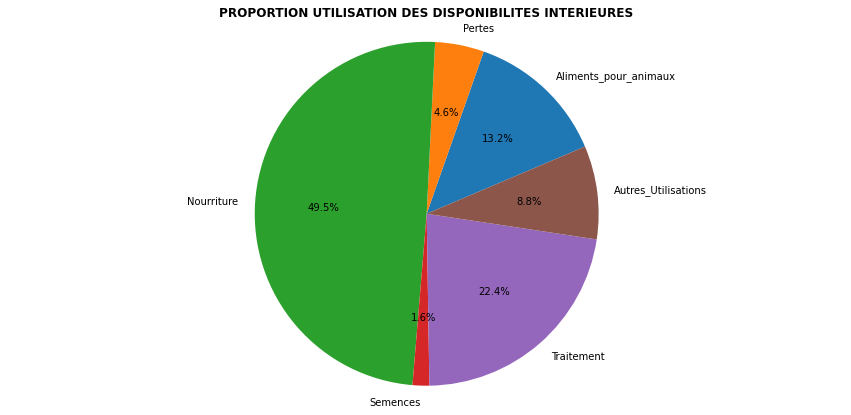

In [3509]:
import matplotlib.pyplot as plt


labels='Aliments_pour_animaux', 'Pertes', 'Nourriture', 'Semences','Traitement', 'Autres_Utilisations'
x=[df_produits[elt].sum() for elt in labels]

#plt.pie(x,labels)
#plt.pie(x, labels)


fig1, ax1 = plt.subplots()
ax1.pie(x, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=23)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.set_title("PROPORTION UTILISATION DES DISPONIBILITES INTERIEURES", fontweight="bold")
fig1.set_size_inches(15, 7)
fig1.savefig(".\PROPORTION UTILISATION DES DISPONIBILITES INTERIEURES.png")
plt.show()

# Pays dont la proportion de personnes sous-alimentées est la plus forte en 2017

In [3366]:
df_sous_nutrition = sous_nutrition_2017.merge(df_population_2017, on='Zone', how='left')
df_sous_nutrition

,Zone,Année_x,Valeur,pop_sous_nourrie,Continent,Année_y,population_2017
0,Afghanistan,2017,10.50,10500000.0,Asie,2017.0,36296113.0
1,Afrique du Sud,2017,3.10,3100000.0,Afrique,2017.0,57009756.0
2,Albanie,2017,0.10,100000.0,Europe,2017.0,2884169.0
3,Algérie,2017,1.30,1300000.0,Afrique,2017.0,41389189.0
4,Angola,2017,5.80,5800000.0,Afrique,2017.0,29816766.0
...,...,...,...,...,...,...,...
99,Turkménistan,2017,0.20,200000.0,Asie,2017.0,5757667.0
100,Ukraine,2017,1.50,1500000.0,Europe,2017.0,44487709.0
101,Vanuatu,2017,0.01,10000.0,Océanie,2017.0,285510.0
102,Venezuela (République bolivarienne du),2017,8.00,8000000.0,Amérique du Sud,2017.0,29402484.0


In [3367]:
df_sous_nutrition["proportion"] = (df_sous_nutrition['pop_sous_nourrie']/df_sous_nutrition['population_2017'])*100

In [3368]:
df_sous_nutrition[["Continent",'Zone', "proportion"]].sort_values(by="proportion", ascending=False).head(10)

,Continent,Zone,proportion
41,Amérique du Sud,Haïti,48.259182
82,Asie,République populaire démocratique de Corée,47.188685
57,Afrique,Madagascar,41.062924
55,Afrique,Libéria,38.279742
53,Afrique,Lesotho,38.249438
94,Afrique,Tchad,37.957606
84,Afrique,Rwanda,35.055619
66,Afrique,Mozambique,32.810898
96,Asie,Timor-Leste,32.173531
0,Asie,Afghanistan,28.928718


# Pays qui ont le plus bénéficié d’aide depuis 2013

In [3369]:
# DF Aide alimentaire par pays depyuis 2013
df_aide_alimentaire = aide_alimentaire.groupby("Pays_bénéficiaire").agg({"Valeur":"sum"})
df_aide_alimentaire.reset_index(inplace=True)
df_aide_alimentaire= df_aide_alimentaire.rename(columns={"Pays_bénéficiaire":"Zone"})
df_aide_alimentaire

,Zone,Valeur
0,Afghanistan,185452
1,Algérie,81114
2,Angola,5014
3,Bangladesh,348188
4,Bhoutan,2666
...,...,...
71,Zambie,3026
72,Zimbabwe,62570
73,Égypte,1122
74,Équateur,1362


In [3370]:
(df_aide_alimentaire.sort_values(by=["Valeur"], ascending=False)).head(10)


,Zone,Valeur
50,République arabe syrienne,1858943
75,Éthiopie,1381294
70,Yémen,1206484
61,Soudan du Sud,695248
60,Soudan,669784
30,Kenya,552836
3,Bangladesh,348188
59,Somalie,292678
53,République démocratique du Congo,288502
43,Niger,276344


# Lien entre les 10 variables

In [3371]:
lien = dispo_alimentaire.dropna()
lien = dispo_alimentaire.groupby(["Zone"]).sum()
lien.reset_index(inplace=True)
lien

,Zone,Aliments_pour_animaux,Autres_Utilisations,Disponibilité_alimentaire_(Kcal/personne/jour),Disponibilité_alimentaire_en_quantité_(kg/personne/an),Disponibilité_de_matière_grasse_en_quantité_(g/personne/jour),Disponibilité_de_protéines_en_quantité_(g/personne/jour),Disponibilité_intérieure,Exportations_-_Quantité,Importations_-_Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation_de_stock
0,Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0
1,Afrique du Sud,5309.0,876.0,3020.0,564.80,83.58,85.33,61256.0,11674.0,7517.0,29812.0,2193.0,63263.0,253.0,22819.0,2153.0
2,Albanie,660.0,174.0,3188.0,1095.54,106.48,111.37,4758.0,94.0,933.0,3476.0,276.0,3964.0,55.0,113.0,-45.0
3,Algérie,4352.0,1707.0,3293.0,809.13,76.48,91.92,42630.0,655.0,17403.0,31729.0,3753.0,26359.0,449.0,637.0,-479.0
4,Allemagne,30209.0,7711.0,3503.0,957.52,141.62,101.39,162275.0,57431.0,65353.0,79238.0,3781.0,154547.0,1551.0,39842.0,-192.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,Émirats arabes unis,1174.0,2689.0,3275.0,700.24,87.16,104.51,11850.0,4343.0,15327.0,6548.0,705.0,1192.0,3.0,804.0,-327.0
170,Équateur,1200.0,1909.0,2346.0,544.91,94.64,61.30,18614.0,8002.0,1725.0,8574.0,707.0,24337.0,138.0,6200.0,557.0
171,États-Unis d'Amérique,148432.0,154699.0,3682.0,1002.39,161.37,109.42,777992.0,163524.0,81887.0,320889.0,7162.0,894668.0,10403.0,141010.0,-35032.0
172,Éthiopie,685.0,3641.0,2129.0,354.55,25.89,60.39,44014.0,941.0,1711.0,33361.0,2256.0,46102.0,640.0,3443.0,-2857.0


In [3372]:
lien.isna().sum().sum()

0

In [3373]:
lien = lien[['Zone','Aliments_pour_animaux', 'Autres_Utilisations','Exportations_-_Quantité','Importations_-_Quantité', 'Nourriture', 'Pertes', 'Production','Semences', 'Traitement', 'Variation_de_stock','Disponibilité_intérieure']]
#Total= lien.sum()
#Total

In [3374]:
A1=lien["Aliments_pour_animaux"]
A2=lien["Autres_Utilisations"]
A3=lien["Nourriture"]
A4=lien["Pertes"]
A5=lien["Semences"]
A6=lien["Traitement"]
#BA_CountrySTAT
B1=lien["Importations_-_Quantité"]
B2=lien["Exportations_-_Quantité"]
B3=lien["Production"]
B4=lien["Variation_de_stock"]

In [3375]:
lien["utilisation"] = (A1+A2+A3+A4+A5+A6)
utilisation.sum()

<ipython-input-3375-0482937c451e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lien["utilisation"] = (A1+A2+A3+A4+A5+A6)


9849173.0

In [3376]:
Disponibilité_intérieure = lien["Disponibilité_intérieure"]
Disponibilité_intérieure.sum()

9848994.0

In [3377]:
lien["disponibilité"] = ((B1+B3+B4)-B2).sum()
disponibilité

<ipython-input-3377-3de6f88a1962>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lien["disponibilité"] = ((B1+B3+B4)-B2).sum()


9849173.0

In [3378]:
utilisation == disponibilité.sum()

True

In [3379]:
#iterate
lien['Diff'] = np.where( lien['utilisation'] == lien['Disponibilité_intérieure'] , '1', '0')
lien.loc[lien['Diff']=='1']

<ipython-input-3379-dde805255a08>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lien['Diff'] = np.where( lien['utilisation'] == lien['Disponibilité_intérieure'] , '1', '0')


,Zone,Aliments_pour_animaux,Autres_Utilisations,Exportations_-_Quantité,Importations_-_Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation_de_stock,Disponibilité_intérieure,utilisation,disponibilité,Diff
11,Autriche,3412.0,1001.0,6733.0,8463.0,9085.0,459.0,18129.0,173.0,5178.0,-556.0,19308.0,19308.0,9849173.0,1
15,Barbade,31.0,28.0,54.0,241.0,203.0,2.0,270.0,1.0,196.0,7.0,461.0,461.0,9849173.0,1
46,Dominique,20.0,24.0,5.0,29.0,68.0,20.0,119.0,4.0,5.0,0.0,141.0,141.0,9849173.0,1
61,Guinée,648.0,371.0,65.0,1021.0,5711.0,1074.0,7735.0,116.0,484.0,-288.0,8404.0,8404.0,9849173.0,1
71,Iraq,3158.0,988.0,147.0,9475.0,15484.0,1529.0,12923.0,513.0,51.0,-530.0,21723.0,21723.0,9849173.0,1
84,Lesotho,1.0,0.0,32.0,467.0,899.0,51.0,418.0,5.0,10.0,114.0,966.0,966.0,9849173.0,1
98,Maurice,102.0,28.0,669.0,940.0,794.0,15.0,4472.0,5.0,3823.0,26.0,4767.0,4767.0,9849173.0,1
112,Népal,1568.0,189.0,214.0,1945.0,16756.0,2110.0,21662.0,590.0,1851.0,-332.0,23064.0,23064.0,9849173.0,1
157,Tunisie,2172.0,177.0,983.0,4803.0,9240.0,710.0,9949.0,151.0,1662.0,345.0,14112.0,14112.0,9849173.0,1
173,Îles Salomon,0.0,237.0,118.0,81.0,362.0,6.0,739.0,0.0,90.0,-10.0,695.0,695.0,9849173.0,1


In [3380]:
lien['disponibilité']

0      9849173.0
1      9849173.0
2      9849173.0
3      9849173.0
4      9849173.0
         ...    
169    9849173.0
170    9849173.0
171    9849173.0
172    9849173.0
173    9849173.0
Name: disponibilité, Length: 174, dtype: float64

In [3381]:
#iterate
lien['Diff'] = np.where( lien['utilisation'] == lien['Disponibilité_intérieure'] , '1', (lien['disponibilité']-lien['utilisation']))
lien.loc[lien['Diff']!='1']
# Mean??? (Disponibilité_intérieure+utilisationdisponibilité)

<ipython-input-3381-2133e4459fde>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lien['Diff'] = np.where( lien['utilisation'] == lien['Disponibilité_intérieure'] , '1', (lien['disponibilité']-lien['utilisation']))


,Zone,Aliments_pour_animaux,Autres_Utilisations,Exportations_-_Quantité,Importations_-_Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation_de_stock,Disponibilité_intérieure,utilisation,disponibilité,Diff
0,Afghanistan,768.0,415.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0,13515.0,13511.0,9849173.0,9835662.0
1,Afrique du Sud,5309.0,876.0,11674.0,7517.0,29812.0,2193.0,63263.0,253.0,22819.0,2153.0,61256.0,61262.0,9849173.0,9787911.0
2,Albanie,660.0,174.0,94.0,933.0,3476.0,276.0,3964.0,55.0,113.0,-45.0,4758.0,4754.0,9849173.0,9844419.0
3,Algérie,4352.0,1707.0,655.0,17403.0,31729.0,3753.0,26359.0,449.0,637.0,-479.0,42630.0,42627.0,9849173.0,9806546.0
4,Allemagne,30209.0,7711.0,57431.0,65353.0,79238.0,3781.0,154547.0,1551.0,39842.0,-192.0,162275.0,162332.0,9849173.0,9686841.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Égypte,15084.0,2262.0,5014.0,24100.0,65957.0,7608.0,95848.0,1365.0,22924.0,199.0,115133.0,115200.0,9849173.0,9733973.0
169,Émirats arabes unis,1174.0,2689.0,4343.0,15327.0,6548.0,705.0,1192.0,3.0,804.0,-327.0,11850.0,11923.0,9849173.0,9837250.0
170,Équateur,1200.0,1909.0,8002.0,1725.0,8574.0,707.0,24337.0,138.0,6200.0,557.0,18614.0,18728.0,9849173.0,9830445.0
171,États-Unis d'Amérique,148432.0,154699.0,163524.0,81887.0,320889.0,7162.0,894668.0,10403.0,141010.0,-35032.0,777992.0,782595.0,9849173.0,9066578.0


# Pays ayant le plus/le moins de disponibilité/habitant

In [3382]:
#Calcul proportion dispo int / pays
# sum de dispo alim  _ groupby zone / sort values / head (10)
#lien["proportion_dispo_quant"] = (lien["Disponibilité_alimentaire_en_quantité_(kg/personne/an)"]/lien["disponibilité_interieure_totale"])*100



In [3383]:
dispo_par_habKg = dispo_alimentaire[["Zone", "Disponibilité_alimentaire_en_quantité_(kg/personne/an)"]].groupby(["Zone"]).sum()
dispo_par_habKg = dispo_par_habKg.sort_values("Disponibilité_alimentaire_en_quantité_(kg/personne/an)",ascending=False)

In [3384]:
    # Pays ayant le plus de disponibilité par habitant
TOP10 = dispo_par_habKg.head(10)
TOP10SUM = (TOP10["Disponibilité_alimentaire_en_quantité_(kg/personne/an)"].sum()/dispo_par_habKg["Disponibilité_alimentaire_en_quantité_(kg/personne/an)"].sum())*100
TOP10

,Disponibilité_alimentaire_en_quantité_(kg/personne/an)
Zone,
Monténégro,1210.41
Luxembourg,1150.66
Irlande,1150.15
Albanie,1095.54
Finlande,1093.77
Grèce,1070.90
Pays-Bas,1069.22
Autriche,1069.20
Lituanie,1050.07


In [3385]:
  # Pays ayant le moins de disponibilité par habitant
BUTTOM10 = dispo_par_habKg.tail(10)
BUTTOM10SUM = (BUTTOM10["Disponibilité_alimentaire_en_quantité_(kg/personne/an)"].sum()/dispo_par_habKg["Disponibilité_alimentaire_en_quantité_(kg/personne/an)"].sum())*100
BUTTOM10

,Disponibilité_alimentaire_en_quantité_(kg/personne/an)
Zone,
Sénégal,376.72
Yémen,375.41
Timor-Leste,369.10
Bangladesh,364.54
Guinée-Bissau,358.48
Éthiopie,354.55
Afghanistan,351.41
Zambie,350.12
Zimbabwe,336.59


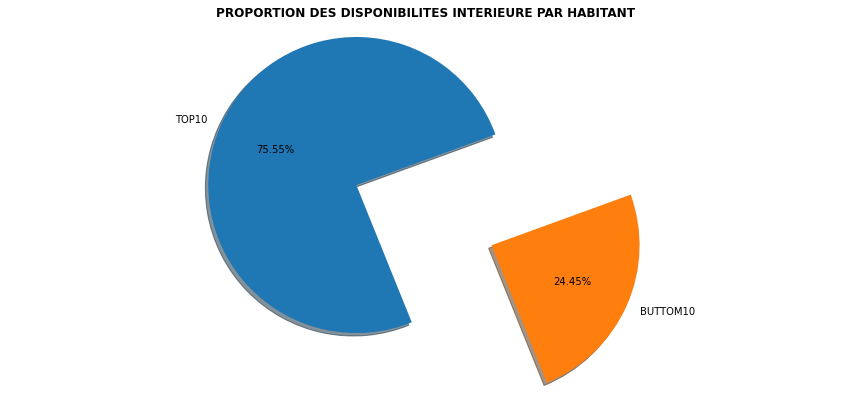

In [3510]:
import matplotlib.pyplot as plt

label = "PROPORTION DES DISPONIBILITES INTERIEURE PAR HABITANT"
labels = "TOP10", "BUTTOM10"
sizes = [ TOP10SUM,  BUTTOM10SUM]
explode = (0, 1)  # seulement "explode" Buttom10 (i.e. 'Buttom10')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=20)
ax1.axis('equal')  # Traitement des ratio pour obtenir un cercle.

plt.title(label , fontdict=None, loc=None, pad=True, y=None,fontweight="bold")
fig1.set_size_inches(15, 7)
fig1.savefig(".\PROPORTION TOP10 BUTTOM10.png")
plt.show()

# Répartition utilisation des céréales entre l’alimentation humaine et l’alimentation pour animaux

In [3387]:
dispo_alimentaire.sample(1)

,Zone,Produit,Origine,Aliments_pour_animaux,Autres_Utilisations,Disponibilité_alimentaire_(Kcal/personne/jour),Disponibilité_alimentaire_en_quantité_(kg/personne/an),Disponibilité_de_matière_grasse_en_quantité_(g/personne/jour),Disponibilité_de_protéines_en_quantité_(g/personne/jour),Disponibilité_intérieure,Exportations_-_Quantité,Importations_-_Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation_de_stock
6136,Hongrie,Huile de Sésame,vegetale,0.0,NaN,0.0,0.0,0.01,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [3388]:
dispo_alimentaire["Produit"].unique()

array(['Abats Comestible', 'Agrumes, Autres', 'Aliments pour enfants',
       'Ananas', 'Bananes', 'Beurre, Ghee', 'Bière', 'Blé',
       'Boissons Alcooliques', 'Café', 'Coco (Incl Coprah)', 'Crème',
       'Céréales, Autres', 'Dattes', 'Edulcorants Autres',
       'Feve de Cacao', 'Fruits, Autres', 'Graines de coton',
       'Graines de tournesol', 'Graisses Animales Crue',
       'Huil Plantes Oleif Autr', 'Huile Graines de Coton',
       "Huile d'Arachide", "Huile d'Olive", 'Huile de Colza&Moutarde',
       'Huile de Palme', 'Huile de Soja', 'Huile de Sésame',
       'Huile de Tournesol', 'Lait - Excl Beurre', 'Légumes, Autres',
       'Légumineuses Autres', 'Maïs', 'Miel', 'Millet', 'Miscellanees',
       'Noix', 'Oeufs', 'Olives', 'Oranges, Mandarines', 'Orge',
       'Plantes Oleiferes, Autre', 'Poissons Eau Douce', 'Poivre',
       'Pommes', 'Pommes de Terre', 'Raisin', 'Riz (Eq Blanchi)',
       'Sucre Eq Brut', 'Sucre, betterave', 'Sucre, canne', 'Sésame',
       'Thé', 'Toma

In [3391]:
df_cereales = dispo_alimentaire[["Zone", "Produit",'Aliments_pour_animaux', 'Autres_Utilisations',
       'Disponibilité_intérieure', 'Exportations_-_Quantité',
       'Importations_-_Quantité', 'Nourriture', 'Pertes', 'Production',
       'Semences', 'Traitement', 'Variation_de_stock',]].groupby(["Produit"]).sum()
df_cereales = df_cereales.reset_index()
df_cereales.head()

,Produit,Aliments_pour_animaux,Autres_Utilisations,Disponibilité_intérieure,Exportations_-_Quantité,Importations_-_Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation_de_stock
0,Abats Comestible,1009.0,848.0,17587.0,4926.0,3892.0,15669.0,73.0,18591.0,0.0,0.0,26.0
1,"Agrumes, Autres",0.0,25.0,12176.0,830.0,1202.0,11359.0,810.0,11758.0,0.0,72.0,46.0
2,"Alcool, non Comestible",0.0,21769.0,21741.0,9900.0,9928.0,0.0,0.0,20763.0,0.0,0.0,950.0
3,Aliments pour enfants,0.0,0.0,84.0,1012.0,1100.0,761.0,1.0,0.0,0.0,0.0,8.0
4,Ananas,0.0,3.0,23282.0,7670.0,6324.0,20757.0,2745.0,24274.0,0.0,8.0,349.0


In [3392]:
# To keep
# Selection des produits "cereales"
df_cereales = df_cereales[df_cereales["Produit"].isin(['Avoine', 'Blé', 'Céréales, Autres', 'Maïs', 'Millet', 'Orge', 'Riz (Eq Blanchi)', 'Seigle','Sorgho'])]
df_cereales.reset_index(inplace=True)
df_cereales

,index,Produit,Aliments_pour_animaux,Autres_Utilisations,Disponibilité_intérieure,Exportations_-_Quantité,Importations_-_Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation_de_stock
0,7,Avoine,16251.0,206.0,23407.0,3531.0,3708.0,3903.0,514.0,23816.0,2485.0,36.0,-577.0
1,12,Blé,129668.0,22424.0,679498.0,198380.0,185377.0,457824.0,27530.0,708443.0,34283.0,7877.0,-15948.0
2,21,"Céréales, Autres",19035.0,1388.0,27485.0,2540.0,2882.0,5324.0,785.0,28412.0,1203.0,160.0,-1267.0
3,52,Maïs,546116.0,189386.0,955799.0,128787.0,122691.0,125184.0,40701.0,1017029.0,6837.0,47648.0,-55136.0
4,54,Millet,3306.0,196.0,29911.0,276.0,343.0,23040.0,2276.0,28909.0,682.0,403.0,933.0
5,62,Orge,92658.0,654.0,140439.0,41585.0,38689.0,6794.0,4628.0,142462.0,8804.0,26910.0,876.0
6,79,Riz (Eq Blanchi),33594.0,18464.0,475656.0,41445.0,37618.0,377286.0,27378.0,495447.0,12194.0,6740.0,-15958.0
7,80,Seigle,8099.0,20.0,16567.0,2372.0,2251.0,5502.0,562.0,16711.0,1262.0,1120.0,-25.0
8,82,Sorgho,24808.0,2049.0,58237.0,6388.0,6418.0,24153.0,2746.0,62116.0,788.0,3695.0,-3913.0


In [3393]:
#cereales_monde = df_cereales['Disponibilité_intérieure'].sum()
print("Proportion d'alimentation humaine :", "{:.2%}".format(df_cereales['Nourriture'].sum()/df_cereales["Disponibilité_intérieure"].sum()))
print("Proportion d'alimentation animale :", "{:.2%}".format(df_cereales['Aliments_pour_animaux'].sum()/df_cereales["Disponibilité_intérieure"].sum()))

Proportion d'alimentation humaine : 42.75%
Proportion d'alimentation animale : 36.29%


In [3394]:
Nourriture = (df_cereales["Nourriture"].sum()/df_cereales["Disponibilité_intérieure"].sum())*100
Nourriture

42.75074480712289

In [3395]:
Aliments_pour_animaux = (df_cereales["Aliments_pour_animaux"].sum()/df_cereales["Disponibilité_intérieure"].sum())*100
Aliments_pour_animaux

36.291456706047654

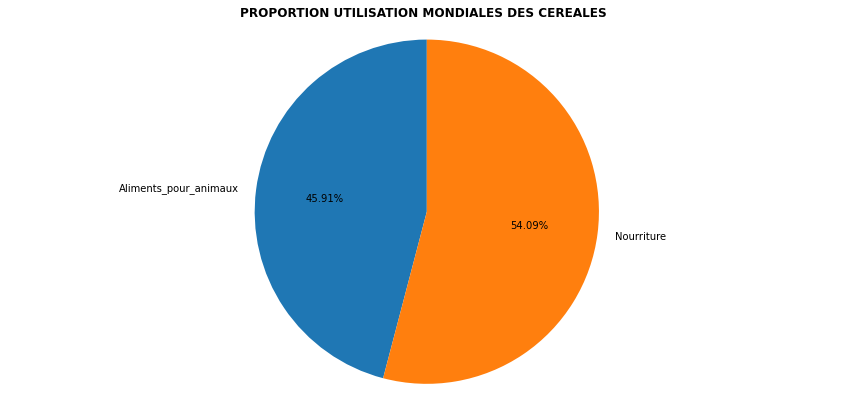

In [3511]:
import matplotlib.pyplot as plt

label = "PROPORTION UTILISATION MONDIALES DES CEREALES "
labels = "Aliments_pour_animaux", "Nourriture"
x = [(df_cereales[el].sum()*100/df_cereales["Disponibilité_intérieure"].sum()) for el in labels]
explode = (0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(x, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Traitement des ratio pour obtenir un cercle.

plt.title(label , fontdict=None, loc=None, pad=None, y=None,fontweight="bold")
fig1.set_size_inches(15, 7)
fig1.savefig("./PROPORTION UTILISATION MONDIALES DES CEREALES.png")
plt.show()

# Utilisation du manioc par la Thaïlande

In [3397]:
Manioc_Thailand = dispo_alimentaire[(dispo_alimentaire["Zone"]=="Thaïlande") & (dispo_alimentaire["Produit"]=="Manioc")]
Manioc_Thailand = Manioc_Thailand[["Zone", "Produit", "Production", "Disponibilité_intérieure", "Exportations_-_Quantité", "Importations_-_Quantité", "Pertes" ]]
Manioc_Thailand = Manioc_Thailand.iloc[0]
Manioc_Thailand

Zone                        Thaïlande
Produit                        Manioc
Production                      30228
Disponibilité_intérieure         6264
Exportations_-_Quantité         25214
Importations_-_Quantité          1250
Pertes                           1511
Name: 13809, dtype: object

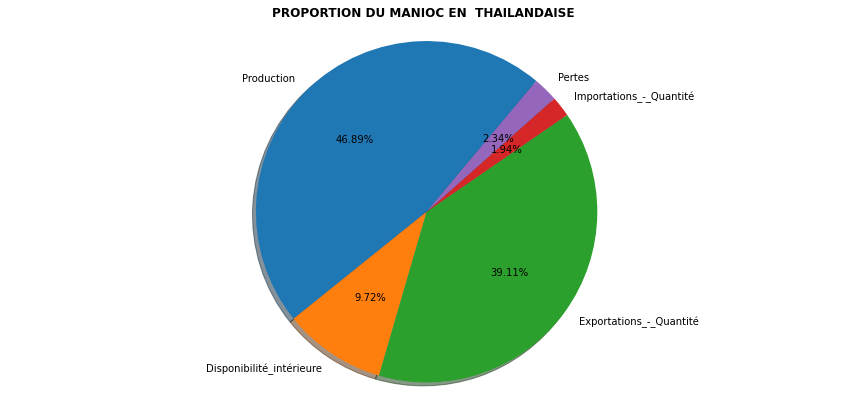

In [3512]:
import matplotlib.pyplot as plt

label = "PROPORTION DU MANIOC EN  THAILANDAISE "
labels = 'Production', 'Disponibilité_intérieure', 'Exportations_-_Quantité', 'Importations_-_Quantité', 'Pertes'
sizes = [Manioc_Thailand[el] for el in labels]
explode = (0, 0,0, 0,0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=50)
ax1.axis('equal')  # Traitement des ratio pour obtenir un cercle.

plt.title(label , fontdict=None, loc=None, pad=None, y=None,fontweight="bold")
fig1.set_size_inches(15, 7)
fig1.savefig("./PROPORTION DU MANIOC EN  THAILANDAISE.png")
plt.show()

In [3399]:
m=sous_nutrition[(sous_nutrition["Zone"]=="Thaïlande")& (sous_nutrition["Année"]=="2017")]     
print("La Thailande exporte {:.2%} de sa production de Manioc, quand sa population en etat de sous nutrition est elle estimée à {}".format(Manioc_Thailand["Exportations_-_Quantité"]/Manioc_Thailand["Production"],m.iloc[0]["pop_sous_nourrie"]))

La Thailande exporte 83.41% de sa production de Manioc, quand sa population en etat de sous nutrition est elle estimée à 6200000.0


In [3400]:
dispo_alimentaire.columns

Index(['Zone', 'Produit', 'Origine', 'Aliments_pour_animaux',
       'Autres_Utilisations', 'Disponibilité_alimentaire_(Kcal/personne/jour)',
       'Disponibilité_alimentaire_en_quantité_(kg/personne/an)',
       'Disponibilité_de_matière_grasse_en_quantité_(g/personne/jour)',
       'Disponibilité_de_protéines_en_quantité_(g/personne/jour)',
       'Disponibilité_intérieure', 'Exportations_-_Quantité',
       'Importations_-_Quantité', 'Nourriture', 'Pertes', 'Production',
       'Semences', 'Traitement', 'Variation_de_stock'],
      dtype='object')

# ANALYSE MACRO

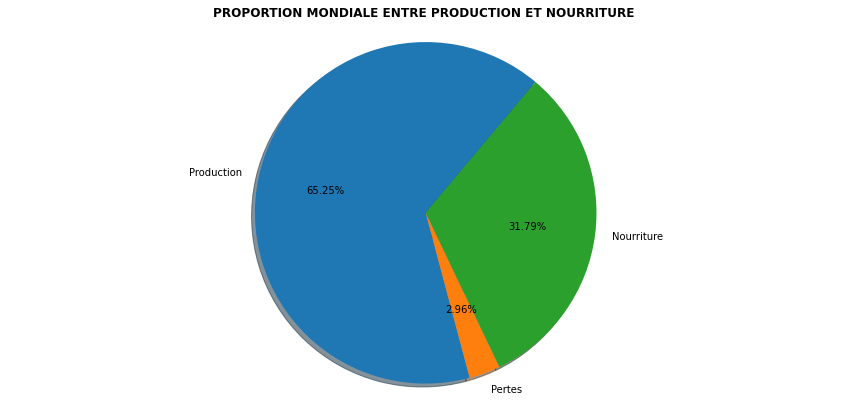

In [3513]:
import matplotlib.pyplot as plt

label = "PROPORTION MONDIALE ENTRE PRODUCTION ET NOURRITURE "
labels = 'Production',  'Pertes', 'Nourriture'
sizes = [dispo_alimentaire[el].sum() for el in labels]
explode = (0, 0,0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=50)
ax1.axis('equal')  # Traitement des ratio pour obtenir un cercle.

plt.title(label , fontdict=None, loc=None, pad=None, y=None,fontweight="bold")
fig1.set_size_inches(15, 7)
fig1.savefig("./proportions_production_nourriture.png")
plt.show()

In [3402]:
production = dispo_alimentaire[["Zone", "Production", "Nourriture","Pertes","Exportations_-_Quantité"]].groupby(["Zone"]).sum()

production = production.merge(df_population_2017, how='left', on='Zone').groupby(["Continent"]).sum()
production.reset_index(inplace=True)
production = production[["Continent",'Production', 'Nourriture',"Pertes","Exportations_-_Quantité"]]
production

,Continent,Production,Nourriture,Pertes,Exportations_-_Quantité
0,Afrique,872571.0,586828.0,77399.0,38793.0
1,Amérique centrale,266586.0,106254.0,12074.0,38687.0
2,Amérique du Nord,1022221.0,354834.0,9280.0,218295.0
3,Amérique du Sud,1624602.0,319679.0,92973.0,231965.0
4,Asie,4872012.0,2915368.0,231282.0,310358.0
5,Australie et Nouvelle-Zélande,127852.0,25787.0,882.0,65989.0
6,Europe,1130806.0,495065.0,28323.0,427323.0
7,Océanie,4714.0,1710.0,70.0,589.0


In [3403]:
production1 = production.pivot_table(columns = ['Afrique', 'Amérique centrale', 'Amérique du Nord',
       'Amérique du Sud', 'Asie', 'Australie et Nouvelle-Zélande',
       'Europe', 'Océanie'], values = ['Production','Nourriture',"Pertes","Exportations_-_Quantité"])
production1.reset_index(inplace=True)
production1

,index,Afrique,Amérique centrale,Amérique du Nord,Amérique du Sud,Asie,Australie et Nouvelle-Zélande,Europe,Océanie
0,Exportations_-_Quantité,38793.0,38687.0,218295.0,231965.0,310358.0,65989.0,427323.0,589.0
1,Nourriture,586828.0,106254.0,354834.0,319679.0,2915368.0,25787.0,495065.0,1710.0
2,Pertes,77399.0,12074.0,9280.0,92973.0,231282.0,882.0,28323.0,70.0
3,Production,872571.0,266586.0,1022221.0,1624602.0,4872012.0,127852.0,1130806.0,4714.0


In [3404]:

for elt in ['Afrique', 'Amérique centrale', 'Amérique du Nord','Amérique du Sud', 'Asie', 'Australie et Nouvelle-Zélande', 'Europe','Océanie' ]:
    ratio=(production1.iloc[0][elt])/(production1.iloc[3][elt])
    print("Proportion des exportations de la production ", elt, "{:.2%}".format(ratio))

Proportion des exportations de la production  Afrique 4.45%
Proportion des exportations de la production  Amérique centrale 14.51%
Proportion des exportations de la production  Amérique du Nord 21.35%
Proportion des exportations de la production  Amérique du Sud 14.28%
Proportion des exportations de la production  Asie 6.37%
Proportion des exportations de la production  Australie et Nouvelle-Zélande 51.61%
Proportion des exportations de la production  Europe 37.79%
Proportion des exportations de la production  Océanie 12.49%


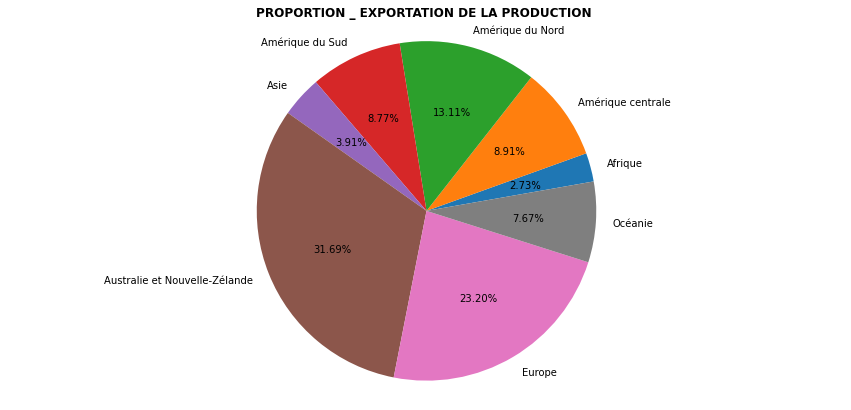

In [3518]:
import matplotlib.pyplot as plt
 

label = "PROPORTION _ EXPORTATION DE LA PRODUCTION "
labels = 'Afrique', 'Amérique centrale', 'Amérique du Nord','Amérique du Sud', 'Asie', 'Australie et Nouvelle-Zélande', 'Europe','Océanie'


sizes = [(production1.iloc[0][elt])/(production1.iloc[3][elt]).sum()*100 for elt in labels]
explode = (0, 0,0, 0,0,0,0,0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=False, startangle=10)
ax1.axis('equal')  # Traitement des ratio pour obtenir un cercle.

plt.title(label , fontdict=None, loc=None, pad=None, y=None,fontweight="bold")
fig1.set_size_inches(15, 7)
fig1.savefig("./Proportion _ exportation de la production.png")
plt.show()

# Taux d’Autosuffisance (TAS) = [Production/(Production+Importations-Exportations)]*100
#(Le TAS exprime l’importance de la production par rapport à la consommation intérieure. Plus le TAS est élevé, Plus le pays se rapproche de l'autosuffisance)

In [3406]:
macro = dispo_alimentaire[["Zone", 'Aliments_pour_animaux',
       'Autres_Utilisations', 'Disponibilité_alimentaire_(Kcal/personne/jour)',
       'Disponibilité_alimentaire_en_quantité_(kg/personne/an)',
       'Disponibilité_de_matière_grasse_en_quantité_(g/personne/jour)',
       'Disponibilité_de_protéines_en_quantité_(g/personne/jour)',
       'Disponibilité_intérieure', 'Exportations_-_Quantité',
       'Importations_-_Quantité', 'Nourriture', 'Pertes', 'Production',
       'Semences', 'Traitement', 'Variation_de_stock']].groupby(["Zone"]).sum()
macro.reset_index(inplace=True)
macro.head(3)

,Zone,Aliments_pour_animaux,Autres_Utilisations,Disponibilité_alimentaire_(Kcal/personne/jour),Disponibilité_alimentaire_en_quantité_(kg/personne/an),Disponibilité_de_matière_grasse_en_quantité_(g/personne/jour),Disponibilité_de_protéines_en_quantité_(g/personne/jour),Disponibilité_intérieure,Exportations_-_Quantité,Importations_-_Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation_de_stock
0,Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0
1,Afrique du Sud,5309.0,876.0,3020.0,564.80,83.58,85.33,61256.0,11674.0,7517.0,29812.0,2193.0,63263.0,253.0,22819.0,2153.0
2,Albanie,660.0,174.0,3188.0,1095.54,106.48,111.37,4758.0,94.0,933.0,3476.0,276.0,3964.0,55.0,113.0,-45.0


In [3408]:
#(Le TAS exprime l’importance de la production par rapport à la consommation intérieure. Plus le TAS est élevé, Plus le pays se rapproche de l'autosuffisance)
macro["TAS"] = (macro["Production"]/(macro["Production"]+macro["Importations_-_Quantité"]-macro["Exportations_-_Quantité"]))*100
macro["TAS"] 

0       80.476911
1      107.033127
2       82.531751
3       61.147841
4       95.123993
          ...    
169      9.789750
170    134.756368
171    110.041069
172     98.357228
173    105.270655
Name: TAS, Length: 174, dtype: float64

In [3464]:
# jointure population + aide alimentaire + sous nutrition
# Calcul de la MOYENNE de la population sous nourrie / de la part de nourriture disponible, de l'aide alimentaire et du TAS par continent
dispo_aide = macro.merge(df_aide_alimentaire, on="Zone", how="outer")
dispo_aide = dispo_aide.rename(columns={"Valeur":"Aide_alimentaire"})
dispo_aide = dispo_aide[["Zone", 'Nourriture', 'Aide_alimentaire', 'TAS']]
dispo_aide.dropna(inplace=True)
dispo_aide=df_population_2017.merge(dispo_aide, how="outer", on="Zone")
dispo_aide=df_sous_nutrition.merge(dispo_aide, how="outer", on="Zone")
dispo_aide = dispo_aide[['Continent_y','Zone', 'Année_x', 'proportion', 'Nourriture', 'Aide_alimentaire', 'TAS']]
dispo_aide = dispo_aide.rename(columns={"proportion":"proportion_population_sous_nourrie"})
dispo_aide = dispo_aide.groupby(["Continent_y"]).mean()
dispo_aide.reset_index(inplace=True)
dispo_aide.dropna(inplace=True)
dispo_aide.columns

Index(['Continent_y', 'proportion_population_sous_nourrie', 'Nourriture',
       'Aide_alimentaire', 'TAS'],
      dtype='object')

In [3471]:
dispo_aide1 = dispo_aide.pivot_table(columns = ['Afrique', 'Amérique centrale','Amérique du Sud', 'Asie', 'Océanie'], 
                                     values = ['Continent_y', 'proportion_population_sous_nourrie', 'Nourriture','Aide_alimentaire', 'TAS'])
dispo_aide1.reset_index(inplace=True)
dispo_aide1

,index,Afrique,Amérique centrale,Amérique du Sud,Asie,Océanie
0,Aide_alimentaire,131386.914286,68500.5000,40824.000000,124997.500000,802.000000
1,Nourriture,11550.257143,4291.5000,11184.666667,81929.950000,184.000000
2,TAS,85.318427,102.8841,99.106961,83.247692,109.365994
3,proportion_population_sous_nourrie,17.238975,9.6386,10.226213,10.924973,3.700697


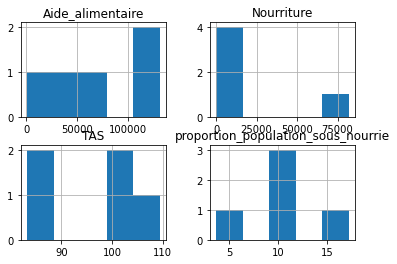

In [3516]:
# Distribution mondiale des variables Aide_alimentaire, Nourriture, TAS, proportion_population_sous_nourrie

labels='Afrique', 'Amérique centrale','Amérique du Sud', 'Asie', 'Océanie'

df = pd.DataFrame({
    'Aide_alimentaire': [(dispo_aide1.iloc[0][elt])for elt in labels],
    'Nourriture': [(dispo_aide1.iloc[1][elt])for elt in labels],
    'TAS': [(dispo_aide1.iloc[2][elt])for elt in labels],
    'proportion_population_sous_nourrie': [(dispo_aide1.iloc[3][elt])for elt in labels]
    }, index=['Afrique', 'Amérique centrale', 'Amérique du Sud', 'Asie','Océanie'])
fig1.savefig(".\Distribution mondiale des variables.png")
hist = df.hist(bins=5)